## COMP90086 -  Group Project

The first section of this notebook shows 2 algorithms, along with some error functions. 

1. Simple Block Matching with Search Window
2. Simple Block Matching with Search Window and Vectorized

Then, there is a section about statistics and chart/table generation. 

Finally, there is an incomplete section with an attempt on a graph cut algorithm.

# Section One - Algorithms

In [1]:
import os
import numpy as np
import cv2  
from matplotlib import pyplot as plt
import random
import pandas as pd

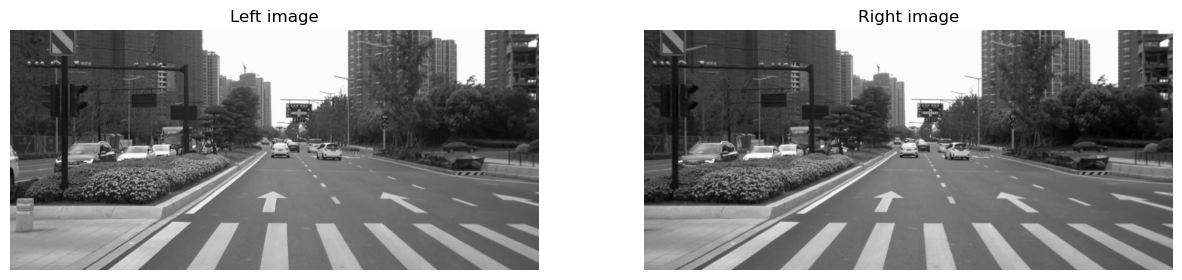

In [2]:
## Attempt 1 - Basic Stero Matching Algorithm (Window Size Matching)
# 1. Read the images in and view
rootpath = "./Dataset"
# Read in images from a filepath as graycsale.
# Note: Some are PNG, some are JPG

imgTwoId = "2018-07-09-16-11-56_2018-07-09-16-13-38-366"
imgTenId = "2018-07-09-16-11-56_2018-07-09-16-30-47-660"

imgId = imgTwoId
imgA = f"{imgId}-left.jpg"
imgB = f"{imgId}-right.jpg"
gtTestPath = f"{imgId}-disparity.png"

gtTest = cv2.imread(os.path.join(rootpath, gtTestPath), cv2.IMREAD_GRAYSCALE) # left image
imgL = cv2.imread(os.path.join(rootpath, imgA), cv2.IMREAD_GRAYSCALE) # left image
imgR = cv2.imread(os.path.join(rootpath, imgB), cv2.IMREAD_GRAYSCALE) # right image

# Assumes same height/width across both images
imgWidth = imgL.shape[1]
imgHeight = imgL.shape[0]

# Display the images
plt.subplots(figsize=(15, 15)) 

plt.subplot(1,2,1)
plt.imshow(imgL, cmap="gray")  
plt.title('Left image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(imgR, cmap="gray")  
plt.title('Right image')
plt.axis('off')

plt.show() 

In [3]:
# Loss Functions
def SSD(leftWindow, rightWindow):
    """Left Window / Right Window are 2d numpy arrays"""
    return np.sum((leftWindow - rightWindow)**2)
        

def SSD1(leftWindow, rightWindow):
    """Left Window / Right Window are 2d numpy arrays"""
        # 2 sums needed as 1st sum sums each column, 2nd sums the sums of cols
    return np.sum(np.sum(np.square(leftWindow - rightWindow), axis=1), axis=0)
        
def SAD(leftWindow, rightWindow):
    """Left Window / Right Window are 2d numpy arrays"""
    if(leftWindow.shape == rightWindow.shape):
        # 2 sums needed as 1st sum sums each column, 2nd sums the sums of cols
        return np.sum(np.sum(abs(leftWindow - rightWindow), axis=1), axis=0)
    else: 
        raise Exception("Shape not right")

# Census transform, BT (birch thomas?)
        
test_a = np.ones((3,3))
test_b = np.ones((3,3))
test_c = np.zeros((3,3))
test_d = np.ones((3,3)) + 2

SSD(test_a, test_d)

36.0

In [4]:
%%time
import time

imgHeight, imgWidth = imgL.shape

# 2. Block Template Matching - "Hyper" - Local Algorithm 
def stereoBlockMatchingAlgorithm(imgL, imgR, windowSize=10):
    # these get incremented as we move along hte image
    
    # index represents window number    
    disparityMap = np.zeros((imgHeight, imgWidth))
    
    # Horizontally walk across the image
    # Goal: calculate "disparity" array for a single row
    for row in range(windowSize, imgHeight - windowSize):
        s = time.time()
        for col in range(windowSize, imgWidth - windowSize):     
            leftWindow = imgL[row: row + windowSize, col: col + windowSize]
            scanLineBound = 56
                        
            leftScanLineBound = max(0, col - scanLineBound)
            # was critical to minus windowSize from below!
            rightScanLineBound = min(imgR.shape[1]-windowSize, col + scanLineBound)
            
            minLoss = 9999999999
            minLossIndex = None

            #print(f"{leftScanLineBound}, {rightScanLineBound}")
            for rightXIndex in range(leftScanLineBound, rightScanLineBound):
                rightWindow = imgR[row: row+windowSize, rightXIndex: rightXIndex+windowSize]
                loss = SSD(leftWindow, rightWindow)
                if loss < minLoss:
                    minLoss = loss
                    minLossIndex = (row, rightXIndex)

            disparityValue = abs(col - minLossIndex[1])
            disparityMap[row][col] = disparityValue
        e = time.time()
        print(f"row done {row}: {e-s}")
    return disparityMap  

Wall time: 0 ns


In [5]:
%%time
disparityMap = stereoBlockMatchingAlgorithm(imgL, imgR, 10)

row done 10: 0.4539971351623535
row done 11: 0.4509251117706299
row done 12: 0.45299649238586426
row done 13: 0.45000219345092773
row done 14: 0.44855165481567383
row done 15: 0.44899964332580566
row done 16: 0.4443521499633789
row done 17: 0.4480001926422119
row done 18: 0.4440000057220459
row done 19: 0.44600844383239746
row done 20: 0.4739997386932373
row done 21: 0.4459996223449707
row done 22: 0.4720003604888916
row done 23: 0.459000825881958
row done 24: 0.4630000591278076
row done 25: 0.44817209243774414
row done 26: 0.46700263023376465
row done 27: 0.45299768447875977
row done 28: 0.4570009708404541
row done 29: 0.45921921730041504
row done 30: 0.49700093269348145
row done 31: 0.48999834060668945
row done 32: 0.46200132369995117
row done 33: 0.46527957916259766
row done 34: 0.4627346992492676
row done 35: 0.4768531322479248
row done 36: 0.4490165710449219
row done 37: 0.4480006694793701
row done 38: 0.44402265548706055
row done 39: 0.44440174102783203
row done 40: 0.44600009918

row done 259: 0.4708583354949951
row done 260: 0.48751235008239746
row done 261: 0.4796433448791504
row done 262: 0.4842696189880371
row done 263: 0.4752388000488281
row done 264: 0.4750828742980957
row done 265: 0.49994540214538574
row done 266: 0.4910011291503906
row done 267: 0.46698689460754395
row done 268: 0.46503186225891113
row done 269: 0.45698094367980957
row done 270: 0.4499666690826416
row done 271: 0.46300196647644043
row done 272: 0.46455931663513184
row done 273: 0.46799802780151367
row done 274: 0.4619021415710449
row done 275: 0.4529991149902344
row done 276: 0.453000545501709
row done 277: 0.49005627632141113
row done 278: 0.4771430492401123
row done 279: 0.4688868522644043
row done 280: 0.48711538314819336
row done 281: 0.4740004539489746
row done 282: 0.4585108757019043
row done 283: 0.5215122699737549
row done 284: 0.5679998397827148
row done 285: 0.5430371761322021
row done 286: 0.46199870109558105
row done 287: 0.45099949836730957
row done 288: 0.4479990005493164

# Attempt to remove the for loops

In [6]:
# Loss Functions
def SSD1(leftWindow, searchWindow):
    """Left Window / Right Window are 2d numpy arrays"""
    # 2 sums needed as 1st sum sums each column, 2nd sums the sums of cols
    return ((searchWindow - leftWindow) ** 2).sum(axis=-1).sum(axis=-1)
        
def SAD1(leftWindow, searchWindow):
    """Left Window / Right Window are 2d numpy arrays"""
    return (abs(searchWindow - leftWindow)).sum(axis=-1).sum(axis=-1)


# Normal cross correlation
def NCC(leftWindow, searchWindow):
    l = np.sqrt(np.mean((leftWindow - np.mean(leftWindow))**2))
    # 800 x 10 x 10
    # 800 x 1
    r = np.sqrt(np.mean((searchWindow - np.mean(searchWindow))**2))
    num = np.mean((pix1 - np.mean(pix1)) * (pix2 - np.mean(pix2)))
    denom = l * r
    
    return num/denom

In [7]:
%%time
import time
from numpy.lib.stride_tricks import sliding_window_view

imgHeight, imgWidth = imgL.shape

# 2. Block Template Matching - "Hyper" - Local Algorithm 
def stereoBlockMatchingAlgorithm2(imgL, imgR, lossFunction, windowSize=10):
    # these get incremented as we move along hte image
    
    # index represents window number    
    disparityMap = np.zeros((imgHeight, imgWidth))
    
    # Horizontally walk across the image
    # Goal: calculate "disparity" array for a single row
    for row in range(windowSize, imgHeight - windowSize):
        for col in range(windowSize, imgWidth - windowSize):     
            leftWindow = imgL[row: row + windowSize, col: col + windowSize]
            scanLineBound = 56
                        
            leftScanLineBound = max(0, col - scanLineBound)
            
            rightScanLineBound = min(imgR.shape[1], col + scanLineBound)
            
            minLoss = float('inf')
            
            input_row = imgR[row: row + windowSize,leftScanLineBound:rightScanLineBound]
            # Generates a "windowSize x windowSize x searchWidth" 3d array of all windows in a search range
            searchMatchingWindows = sliding_window_view(input_row, (windowSize,windowSize))
            # Through numpy broadcasting, leftWindow, originally windowSize x windowSize, becomes the same shape as above
            # And we can efficiently subtract from above and calculate SSD / SAD
            ssds = lossFunction(leftWindow, searchMatchingWindows)
            argmin = ssds.argmin() + leftScanLineBound
            disparityValue = abs(col - argmin)
            disparityMap[row][col] = disparityValue
    return disparityMap  

Wall time: 0 ns


In [8]:
%%time
dispMap5 = stereoBlockMatchingAlgorithm2(imgL, imgR, SSD1, 5)
dispMap15 = stereoBlockMatchingAlgorithm2(imgL, imgR, SSD1, 15)
dispMap25 = stereoBlockMatchingAlgorithm2(imgL, imgR, SSD1, 25)

Wall time: 1min 10s


# Disparity Map Calculation and Plotting

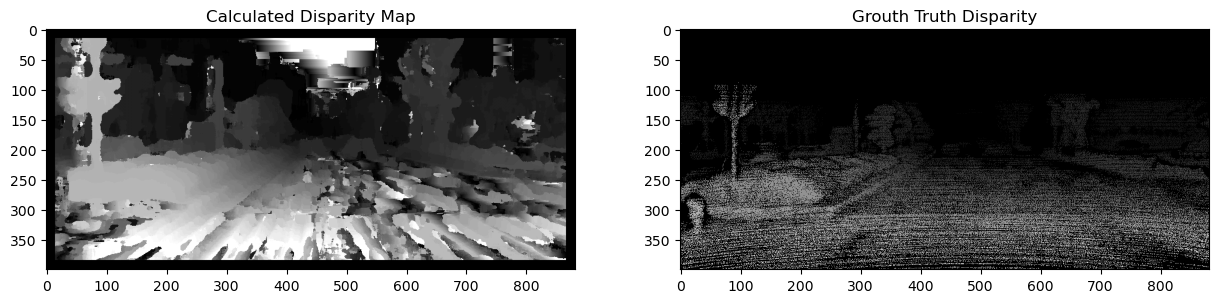

In [9]:
# Plot our map vs ground truth
plt.subplots(figsize=(15, 15)) 

plt.subplot(1,2,1)

plt.imshow(dispMap15, cmap="gray")  
plt.title('Calculated Disparity Map')

plt.subplot(1,2,2)
plt.imshow(gtTest, cmap="gray")  
plt.title('Grouth Truth Disparity')

plt.show() 

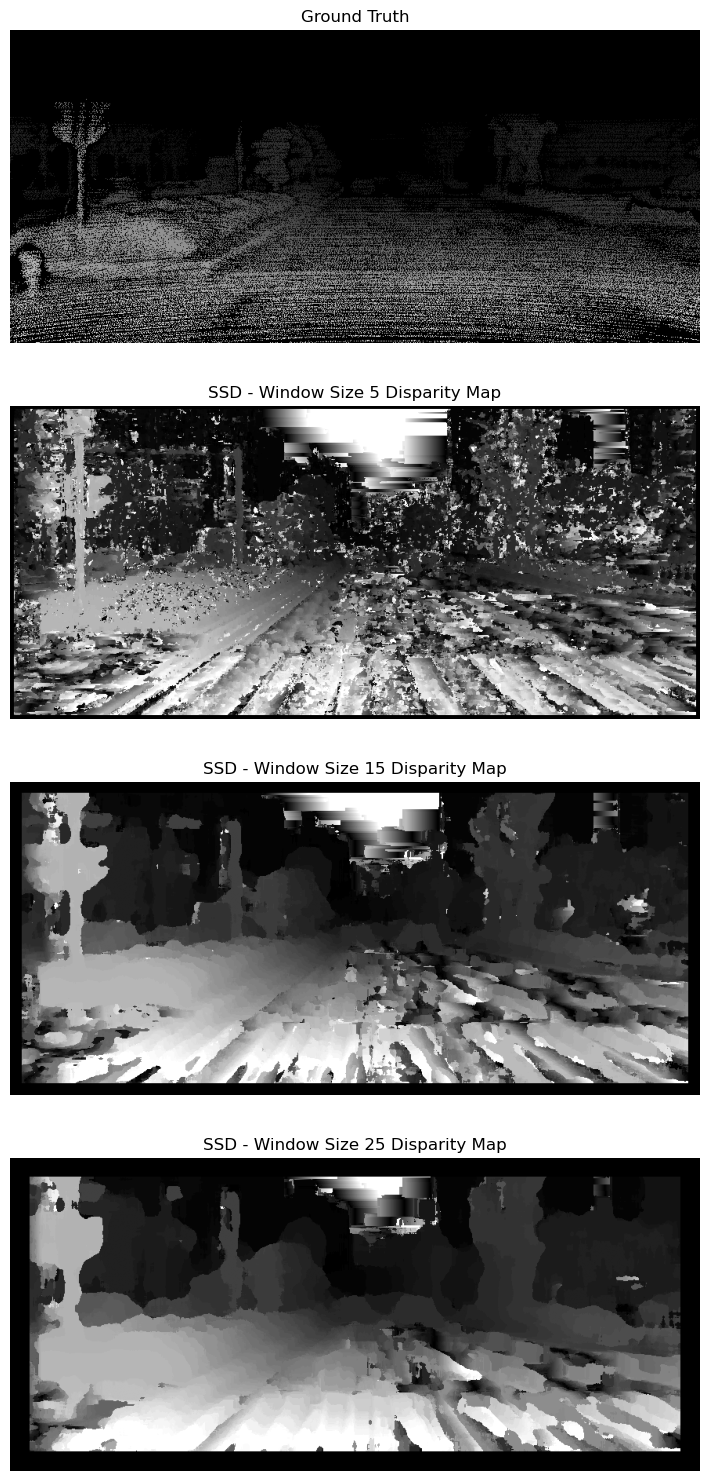

In [10]:
# Code to show an image and disparity map, of a set of window sizes, for report purposes
plt.subplots(figsize=(15, 15)) 
plt.tight_layout()
# plt.subplot(1,3,1)
# plt.imshow(imgL, cmap="gray")  
# plt.title('Image Reference')
# plt.axis('off')

plt.subplot(4,1,1)
plt.imshow(gtTest, cmap="gray")  
plt.title('Ground Truth')
plt.axis('off')

plt.subplot(4,1,2)
plt.imshow(dispMap5, cmap="gray")  
plt.title('SSD - Window Size 5 Disparity Map')
plt.axis('off')

plt.subplot(4,1,3)

plt.imshow(dispMap15, cmap="gray")  
plt.title('SSD - Window Size 15 Disparity Map')
plt.axis('off')

plt.subplot(4,1,4)
plt.imshow(dispMap25, cmap="gray")  
plt.title('SSD - Window Size 25 Disparity Map')
plt.axis('off')

plt.show() 

# Section Two - Statistics

In [11]:
def disp_rmse(disparity_map, ground_truth):
    rmse = []
    
    # Flatten images to one dimension
    disp = disparity_map.flatten()
    gt = ground_truth.flatten()
    gt = gt/256
    
    # Only considering pixels from ground truth that are not equal to 0
    non_zero = np.where(gt != 0)[0]

    return round(np.sqrt(mean_squared_error(gt[non_zero], disp[non_zero])),2)

In [12]:
def error_analysis(disp_map, ground_truth, thresh_list):
    err = []
    thresh_err = []
    
    disp = disp_map.flatten()
    gt = ground_truth.flatten()
    
    non_zero = np.where(gt != 0)[0]
    
    # Division by 256, assumption is that the GT values are 16bit
    # Allows for sub-pixel precision
    for i in non_zero:
        err.append(abs(disp[i] - gt[i]/256))
        
    for num in thresh_list:
        thresh_err.append((sum(i < num for i in err)) / len(non_zero))
        
    return thresh_err

In [ ]:
%%time
import pandas as pd
import time
def generateExperimentalResults(imgs, gts, windowSizes = [5,15,25]):
    """Input: sorted imgs array, sorted gt array"""
    
    data = []        
    for windowSize in windowSizes:
        imgNumber = 1
        for imgL, imgR, gt_path in zip(imgs[0::2], imgs[1::2], gts):   
            print(f"Processing: left: {imgL} right: {imgR} ground truth is: {gt_path}")
            imgL = cv2.imread(imgL, cv2.IMREAD_GRAYSCALE)
            imgR = cv2.imread(imgR, cv2.IMREAD_GRAYSCALE)
            gt = cv2.imread(gt_path, -1)
            
            t1 = time.time()
            dispMap1 = stereoBlockMatchingAlgorithm2(imgL, imgR, SSD1, windowSize)
            t2 = time.time()
            # Runtime in seconds
            runtimeSSD = t2 - t1
            
            t1 = time.time()
            dispMap2 = stereoBlockMatchingAlgorithm2(imgL, imgR, SAD1, windowSize)
            t2 = time.time()
            runtimeSAD = t2 - t1
            
            # Save results to DF
            rmsSSD = disp_rmse(dispMap1, gt)
            rmsSAD = disp_rmse(dispMap2, gt)
            
            subPixelErrorSSD = error_analysis(dispMap1, gt, [4 ,2 ,1 ,0.5 ,0.25]) 
            subPixelErrorSAD = error_analysis(dispMap2, gt, [4 ,2 ,1 ,0.5 ,0.25]) 
            
            row_dict = {"IMG": imgNumber, "SSD": rmsSSD, "SAD": rmsSAD, "WS": windowSize, 
                        "RuntimeSSD":runtimeSSD , "RuntimeSAD": runtimeSAD, 
                        "SubPixelErrorSSD":subPixelErrorSSD, "SubPixelErrorSAD": subPixelErrorSAD}
            data.append(row_dict)
            imgNumber += 1
            
    df = pd.DataFrame(data=data, columns=["IMG","SSD", "SAD", "WS", "RuntimeSSD", "RuntimeSAD", "SubPixelErrorSSD", "SubPixelErrorSAD"])
    return df

# Main driver code to generate a "DF" that can be exported for interpretation
# Note: assumption is the dataset is the one given in the assignment, and also, the OS is windows.
# There may be different results when "sorted" is called on other OS

imgs = [file for file in sorted(glob.glob("./Dataset/*jpg"))]
gts = [file for file in sorted(glob.glob("./Dataset/*png"))]
windowSizes = [5,15,25]

numImagePairs = 10
imgs = imgs[:numImagePairs*2]
gts = gts[:numImagePairs]
    
df = generateExperimentalResults(imgs,  gts, windowSizes)
df

In [ ]:
# Save the above to CSV so it can be input into the word document report
df.to_csv("./final_results.csv")

In [ ]:
# Charting code for the RMSE 
plt.subplots(figsize=(7, 7))
unique_windowSizes = np.unique(df["WS"])

# Serves as x axis in graph
unique_imgnums = np.unique(df["IMG"])

for i,k in enumerate(unique_windowSizes):
    plt.subplot(num_ws, 1, i+1)
    plt.title(f'Window Size: {np.unique(df["WS"])[i]}', fontsize = 12)
    plt.grid(color='gray', linestyle='-', linewidth=0.2)
    plt.ylim(15,27)
    plt.ylabel("RMSE")
    plt.xlabel("Ground Truth")
    ticks = range(1, numImagePairs+1)
    plt.xticks(ticks)
    
    # Filter the current window size
    subdf = df[df["WS"]==k]
    ssd_data = subdf["SSD"]
    sad_data = subdf["SAD"]

    ssd_mean = round(np.mean(ssd_data),2)
    sad_mean = round(np.mean(sad_data),2)
    
    plt.plot(unique_imgnums, ssd_data, label= f'SSD Mean - {ssd_mean}')
    plt.legend(loc = 'best', fontsize = 9)
    plt.plot(unique_imgnums, sad_data, label= f'SAD Mean - {sad_mean}')
    plt.legend(loc = 'best', fontsize = 9)
        
plt.subplots_adjust(hspace=0.6)

In [ ]:
# DF manipulation to generate tables for the word report

img = df.IMG
subPixelErrorSSD = df.SubPixelErrorSSD
subPixelErrorSAD = df.SubPixelErrorSAD
windowSize = df.WS
resultspd = pd.concat([img, subPixelErrorSAD, subPixelErrorSSD, windowSize], axis=1)

data = {
    "4": resultspd["SubPixelErrorSAD"].str[0],
    "2": resultspd["SubPixelErrorSAD"].str[1],
    "1": resultspd["SubPixelErrorSAD"].str[2],
    "0.5": resultspd["SubPixelErrorSAD"].str[3],
    "0.25": resultspd["SubPixelErrorSAD"].str[4]
}

#print(data)

subPixelPd = pd.DataFrame.from_dict(data = data)
subPixelPdSAD = pd.concat([img, windowSize, subPixelPd], axis=1)
subPixelPdSAD.to_csv("./subpixelsad.csv")

data2 = {
    "4": resultspd["SubPixelErrorSSD"].str[0],
    "2": resultspd["SubPixelErrorSSD"].str[1],
    "1": resultspd["SubPixelErrorSSD"].str[2],
    "0.5": resultspd["SubPixelErrorSSD"].str[3],
    "0.25": resultspd["SubPixelErrorSSD"].str[4]
}

subPixelPd = pd.DataFrame.from_dict(data = data2) 
subPixelPdSSD = pd.concat([img, windowSize, subPixelPd], axis=1)
subPixelPdSSD
subPixelPdSSD.to_csv("./subpixelssd.csv")

# Method 2 - Incomplete Graph Cuts

An attempt was made to re-implement the alpha-expansion graph cut algorithm from "Kolmogorov and Zabih’s Graph Cuts Stereo Matching Algorithm". The approach taken was to read the paper, understand the different elements and using the provided C++ code from the paper, reimplement the algorithm.

The motivation behind using Graph Cuts is that it solves the hyper-local problem that simple block template matching suffers from. Rather than assign a pixel a disparity based on just the "data" term, that is, the differences in value intensities between the left and right image, Kolmogorov and Zabig's graph cut algorithm adds a smoothness, uniqueness and occlusion term to form a minimizable energy function. 

The energy function is minized through finding the best labelling (which we found useful to think of as a function that maps pixels to disparity labels) through a series of "alpha-expansion" moves. 

Unfortunately, due to running out of time this was unable to be fully completed.

Key considerations:

1. The original algorithm handles for both grayscale and color images. Ours was to focus on grayscale for simplicity.
2. KZ implements their own graph structure and maxflow algorithms, we use the PyMaxFlow library instead.
3. C++ Implementation may run a lot faster than our python implementation, and no guarantees of correctness are ensured as there was some ambiguity while translating from C++


https://hal-enpc.archives-ouvertes.fr/hal-01074878/document
http://www.cs.cornell.edu/rdz/Papers/BVZ-iccv99.pdf
http://pmneila.github.io/PyMaxflow/maxflow.html

https://www.cs.cmu.edu/~16385/s17/Slides/13.2_Stereo_Matching.pdf
https://cs.uwaterloo.ca/~mannr/cs787-f04/cs787-a3.pdf


In [ ]:
%%time
# Test Max Flow 
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import maxflow

def plot_graph_2d(graph, nodes_shape, plot_weights=True, plot_terminals=True, font_size=7):

    X, Y = np.mgrid[:nodes_shape[0], :nodes_shape[1]]
    aux = np.array([Y.ravel(), X[::-1].ravel()]).T
    positions = {i: v for i, v in enumerate(aux)}
    positions['s'] = (-1, nodes_shape[0] / 2.0 - 0.5)
    positions['t'] = (nodes_shape[1], nodes_shape[0] / 2.0 - 0.5)

    nxgraph = graph.get_nx_graph()
    if not plot_terminals:
        nxgraph.remove_nodes_from(['s', 't'])

    plt.clf()
    nx.draw(nxgraph, pos=positions)

    if plot_weights:
        edge_labels = {}
        for u, v, d in nxgraph.edges(data=True):
            edge_labels[(u, v)] = d['weight']
        nx.draw_networkx_edge_labels(nxgraph,
                                     pos=positions,
                                     edge_labels=edge_labels,
                                     label_pos=0.3,
                                     font_size=font_size)

    plt.axis('equal')
    plt.show()
    
def testMaxFlow():
    g = maxflow.Graph[int]()
    nodes = g.add_grid_nodes((5,5))

    # Attempt to add a connection to sink and source for a node
    # add_tedge(self, int i, long cap_source, long cap_sink)

    g.add_tedge(nodes[0][0], 1,1)
    g.add_tedge(nodes[0][0], 2,2)
    flow = g.maxflow()
    print(f"Maximum flow: {flow}")
    print(f"Segment of the node 0: {g.get_segment(nodes[0][0])}")
    print(f"Segment of the node 1: {g.get_segment(nodes[1][1])}")
    plot_graph_2d(g, nodes.shape, plot_terminals=True)


def testBulkAddSinkSource():
    g = maxflow.Graph[int]()
    # Add two (non-terminal) nodes. Get the index to the first one.
    nodes = g.add_grid_nodes((5,5))
    add_grid_tedges
    
testMaxFlow()

In [ ]:
# match.cpp
class Match():
    def __init__(self, imgL,imgR, color=False):
        self.dispMin = 0
        self.dispMax = 0
        # not sure why they don't store a pointer to the image in the implementation..?
        self.imgL = imgL
        self.imgR = imgR
        self.imgHeightL = imgL.shape[0]
        self.imgWidthL = imgL.shape[1]
        self.imgSizeL = imgL.shape
        self.imgSizeR = imgR.shape
        
        
        # These are "img maps" that keep track of current disparity, active assignments
        # Represents 4 directions of neighbourhood
        self.NUM_NEIGHBOURS = 4
        self.NEIGHBOURS = [(1,0), (-1,0), (0,1), (0,-1)]
        
        # d_left is left disparity map
        self.d_left = np.empty((self.imgHeightL, self.imgWidthL))
        self.d_right = np.empty((self.imgHeightL, self.imgWidthL))
        self.vars0 = np.empty((self.imgHeightL, self.imgWidthL))
        self.varsA = np.empty((self.imgHeightL, self.imgWidthL))
        
        # Class constants
        # Constant, cost of occlusion is infinity
        self.OCCLUDED = float('inf')
        # Represents the disparity alpha before expansion move
        self.VAR_ALPHA = -1
        # ??
        self.VAR_ABSENT = -2
        
        # Penality for inactive assignment
        self.K = 10
        
        # Params for controlling disparity detection theresholds 
        # and smoothness costs
        self.EDGE_THRESHOLD = 10
        self.lambda1 = 10
        self.lambda2 = 10
            
    # Essentially, what range can disp go to for labels?
    def setDisparityRange(self, dmin, dmax):
        if dmin < dmax:
            self.dispMin = dmin
            self.dispMax = dmax
        # Set every pixel in left and right to be occluded
        for row in range(0, self.imgHeightL):
            for col in range(0, self.imgWidthL):
                p = (col, row)
                self.setImgRef(self.d_left, p, self.OCCLUDED)
                
        for row in range(0, self.imgHeightL):
            for col in range(0, self.imgWidthL):
                p = (col, row)
                self.setImgRef(self.d_right, p, self.OCCLUDED)
    
        
    def computeEnergy(self):
        e = 0
        for row in range(0, self.imgHeightL):
            for col in range(0, self.imgWidthL):
                p1 = (col, row)
                d1 = self.getImgRef(self.d_left,p1)
                if d1 != self.OCCLUDED:
                    e += self.occlusion_penalty()
                for i in range(self.NUM_NEIGHBOURS):
                    # TODO: check if p2 is in the image
                    p2 = p1 + self.NEIGHBOURS[i]
                    d2 = self.getImgRef(self.d_left, p2)
                    # Check if the disparity is the same
                    if d1==d2:
                        continue
                    elif d1 != self.OCCLUDED and self.inImage(p2+d1, self.imgSizeR):
                        e += self.smoothness_penalty(p1, p2, d1)
                    elif d2 != self.OCCLUDED and self.inImage(p1+d2, self.imgSizeR):
                        e += self.smoothenss_penality(p1, p2, d2)
        return e
                    
                    
    def inImage(self, pixel, dimShapeTuple):
        """Pixel is (x,y), dimShapeTuple is (x_max, y_max)"""
        y = pixel[0]
        x = pixel[1]
        max_y = dimShapeTuple[0]
        max_x = dimShapeTuple[1]
        if y > 0 and y < max_y and x > 0 and x < max_x:
            return True
        return False
    
    def occlusion_penalty(self):
        return 0        
    
    # Programming by "Following the stack"
    def run(self):
        dispSize = self.dispMax - self.dispMin + 1
        permutation = [0]*dispSize

        E = self.computeEnergy()
        
        # HACK: Does this match std::fill_n?
        done = [False]*dispSize
        nDone = dispSize
        
        # main loop
        step = 0
        maxIterations = 100
        for it in range(maxIterations):
            if it == 0:
                # In KZ2 --> Fisher Yates Shuffle was implemented
                permutation = np.random.permutation(permutation)
            for i in range(dispSize):
                label = permutation[i]
                if done[label]:
                    continue
                step += 1
                
                # pass in the current label to expand
                if self.ExpansionMove(self.dispMin+label):
                    # HACK: Does this match std::fill_n?
                    done = [False]*dispSize

                done[label] = true
                nDone =- 1
        print(f"Iterations: {step/dispSize}")
        
    # Key part of the algorithm - computes alpha-expansion move
    def ExpansionMove(self, alpha):            
            # CTOR just for reversing memory AFAIK
            e = maxflow.Graph[int]()
                        
            # Build Graph
            # nxn looping slow, tensor // faster way may become essential 
            for row in range(0, self.imgHeightL):
                for col in range(0, self.imgWidthL):
                    p1 = (col, row)
                    self.buildNodes(e, p1, alpha, self.imgWidthL, self.imgHeightL)
            
            # Apply smoothness, etc
            for row in range(0, self.imgHeightL):
                for col in range(0, self.imgWidthL):
                    p1 = (col, row)
    
                    for k in range(self.NUM_NEIGHBOURS):
                        p2 = p1 + self.NEIGHBOURS[k]
                        # They check here if p2 is in image... OH! for edge cases
                        if(self.inImage(pixel)):
                            self.build_smoothness(e, p1, p2, a)
            
            # After adding "weights" and terms to the graph, calculate the maxflow
            # which is the 
            E = e.maxflow() # + self.data_occlusion
            print(f"Energy calculated is {E}")
            
            oldE = E
            if E < oldE:            
                self.updateDisparity(e, a)
                assert(self.ComputeEnergy()==E)
                return True
            else:
                return False

    # "Build Smoothness Term" for neigbouring pixels
    # My understanding is that we are adding energy terms onto the 
    # global E function
    def build_smoothness(e, p1, p2 , a):
        d1 = self.getImgRef(self.d_left, p1)
        o1 = self.getImgRef(self.vars0, p1)
        a1 = self.getImgRef(self.varsA, p1)
        
        d2 = self.getImgRef(self.d_left, p2)
        o2 = self.getImgRef(self.vars0, p2)
        a2 = self.getImgRef(self.varsA, p2)
        
        if(a1 != self.VAR_ABSENT and a2 != self.VAR_ABSENT):
            delta = self.smoothness_penalty(p1, p2, a)
            
#             e.add_tedge(node_l_p, 0, delta)
#             e.add_tedge(node_l_q, 0, delta)

                                            
    # /// Compute the smoothness penalty of assignments (p1,p1+d) and (p2,p2+d)
    # Assumes gray, there is a color version too
    # Intuitively, 
    def smoothness_penalty(self, p1, p2, disp):
        dl = self.getImgRef(self.imgL, p1) - self.getImgRef(self.imgL, p2)
        dr = self.getImgRef(self.imgR, p1+disp) - self.getImgRef(self.imgR, p2+disp)
        dl = abs(dl)
        dr = abs(dr)
        
        # Count?
        # Param of "l", if past a threshold, assign cost
        # of l1 NOT crossing an edge (eg, a road) or l2 (crossing an edge)
        if dl < self.EDGE_THRESHOLD:
            return self.lambda1
        else: 
            return self.lambda2
        
        
    # Assumes gray, there is a color version too, gray distance between p and q
    # Birchfield-Tomasi??
    # My understanding is just the diff between image intensity at two pixels
    def data_penalty(self, p1, q1):
        Ip = self.getImgRef(self.imgL, p1)
        Iq = self.getImgRef(self.imgR, q1)
        
        # Upper bound for intensity difference
        CUTOFF = 30
        d = abs(Ip - Iq)
        # Idea is to not penalise too hard for mismatches
        if d > CUTOFF: 
            d = CUTOFF
        # TODO: they have a param here for L2 cost, we skip
        return d
        
    
    # They use this imRef function to get the value of any pixel P in the image
    # Img is 2-dnparray, Pixel is a (x,y) tuple
    def getImgRef(self, img, pixel):
        return img[pixel[1], pixel[0]]
    
    def setImgRef(self, img, pixel, value):
        img[pixel[1], pixel[0]] = value
    
    # Check whether a pixel is in the image
    def inImage(self, pixel):
        return True
                          
    # TODO: for each pixel, add an edge to the neighbouring pixels AND the sink/source node
    def buildNodes(self, g, pixel, a, width, height):
        nodes = g.add_grid_nodes(width,height)
        for i in range(len(nodes)):
            # 1. Neighbouring pixels
            for k in range(self.NUM_NEIGHBOURS):
                neighbour = pixel + self.NEIGHBOURS[k]
                nodeids = g.add_grid_nodes((width, height))
                #g.add_grid_edges(nodeids, 2)
            

In [ ]:
import maxflow
import cv2
import numpy as np
import os
print(maxflow.__version__)

## Attempt 1 - Basic Stero Matching Algorithm (Window Size Matching)
# 1. Read the images in and view
rootpath = "./Dataset"
# Read in images from a filepath as graycsale.
# Note: Some are PNG, some are JPG

imgA = f"2018-07-09-16-11-56_2018-07-09-16-11-56-702-left.jpg"
imgB = f"2018-07-09-16-11-56_2018-07-09-16-11-56-702-right.jpg"

imgL = cv2.imread(os.path.join(rootpath, imgA), cv2.IMREAD_GRAYSCALE) # left image
imgR = cv2.imread(os.path.join(rootpath, imgB), cv2.IMREAD_GRAYSCALE) # right image

# main algorithm that generate the disparity map
def mainGraphCut(imgL, imgR, color=True):
    m = Match(imgL, imgR, color)
    m.setDisparityRange(0,255)
    m.run()
    m.saveDisparityMap()    
    
mainGraphCut(imgL, imgR)